In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
import torch
import random

In [5]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)
print('features:{}\nlabels:{}'.format(features[0],labels[0]))

features:tensor([-0.0481, -0.0732])
labels:tensor([4.3448])


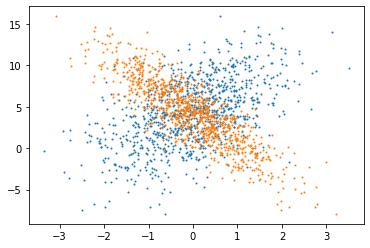

In [6]:
plt.scatter(features[:,(0)].detach().numpy(), labels.detach().numpy(),1)
plt.scatter(features[:,(1)].detach().numpy(), labels.detach().numpy(),1)

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.5135,  0.1942],
        [-1.1019, -0.0036],
        [-1.8003, -0.6313],
        [ 1.1723, -1.1244],
        [-0.4164,  0.8886],
        [-1.5908, -1.0868],
        [-1.0350,  0.2477],
        [-0.1708, -0.7049],
        [ 0.5128,  0.4702],
        [ 0.6798,  0.3306]]) 
 tensor([[ 4.5425],
        [ 2.0005],
        [ 2.7469],
        [10.3745],
        [ 0.3662],
        [ 4.6981],
        [ 1.2822],
        [ 6.2691],
        [ 3.6267],
        [ 4.4348]])


In [8]:
features, labels = synthetic_data(true_w, true_b, 1000)
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def linreg(X, w, b):
    return torch.matmul(X,w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.019617
epoch 2, loss 0.000079
epoch 3, loss 0.000054


In [13]:
from torch.utils import data
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

[tensor([[-7.3291e-01,  1.0878e-03],
         [ 5.6396e-01, -4.7374e-01],
         [-9.5345e-01,  6.2960e-02],
         [-2.3682e-01, -5.5623e-01],
         [ 2.6820e+00,  1.2099e+00],
         [ 9.0341e-01, -2.9931e-01],
         [ 7.3662e-01,  1.7084e-01],
         [ 4.4650e-01, -8.9181e-02],
         [-4.5738e-01,  2.1337e-02],
         [-1.6768e-01,  1.4388e+00]]),
 tensor([[ 2.7405],
         [ 6.9336],
         [ 2.0726],
         [ 5.6010],
         [ 5.4453],
         [ 7.0391],
         [ 5.1084],
         [ 5.3960],
         [ 3.2211],
         [-1.0267]])]

In [16]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

loss = nn.MSELoss()

trainer = torch.optim.SGD(net.parameters(), lr=0.03)

num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000143
epoch 2, loss 0.000109
epoch 3, loss 0.000110
